## В этом модуле, мы продолжаем разбираться с задачей, начнем исследовать данные

Описание данных:

events_train.csv - данные о действиях, которые совершают студенты со стэпами

step_id - id стэпа
user_id - анонимизированный id юзера
timestamp - время наступления события в формате unix date
action - событие, возможные значения: 
discovered - пользователь перешел на стэп
viewed - просмотр шага,
started_attempt - начало попытки решить шаг, ранее нужно было явно нажать на кнопку - начать решение, перед тем как приступить к решению практического шага
passed - удачное решение практического шага


submissions_train.csv - данные о времени и статусах сабмитов к практическим заданиям

step_id - id стэпа
timestamp - время отправки решения в формате unix date
submission_status - статус решения
user_id - анонимизированный id юзера

In [15]:
import pandas as pd
import numpy as np

submissions_data = pd.read_csv(r'C:\Users\DEMO\Downloads\submissions_data_train.zip') #указываете свой путь

submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [83]:
events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip')
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [96]:
ee=events_data.loc[events_data.action == 'passed',['user_id', 'action']]


In [98]:
ee.sort_values(by='action')

,user_id,action
1,17632,passed
2255653,14092,passed
2255657,21066,passed
2255660,14092,passed
2255664,14092,passed
...,...,...
1108399,9365,passed
1108406,9365,passed
1108416,21095,passed
1108374,21626,passed


In [102]:
eq = ee.groupby('user_id', as_index = False) \
    .agg({'action': 'count'})
eq.sort_values(by='action', ascending=False)

,user_id,action
8631,13365,198
16510,25632,198
2995,4546,198
13758,21395,198
10641,16489,198
...,...,...
12116,18806,1
12114,18802,1
12108,18795,1
4395,6733,1


In [93]:
ee.action.max()

33043

In [52]:
events_data.groupby('user_id', as_index = False) \
    .agg({'timestamp': 'count'}).max()

user_id      26798
timestamp    33043
dtype: int64

In [103]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit = 's')
submissions_data['day'] = submissions_data.date.dt.date
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [148]:
events_data.groupby('user_id', as_index = False) \
    .agg({'step_id': 'count'}).sort_values(by='step_id', ascending=False)

,user_id,step_id
15007,20907,33043
7780,10794,16436
18150,25279,10179
781,1046,9095
2611,3572,7905
...,...,...
14064,19546,2
0,1,2
8225,11437,1
6334,8773,1


In [147]:
users_scores = submissions_data.pivot_table(index='user_id', 
                        columns='submission_status', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index()
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


### Определение бросивших курс посредством анализа промежутка времени зная который можно утверждать, что студент бросил курс

In [144]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit = 's')
events_data['day'] = events_data.date.dt.date
events_data[['user_id', 'day', 'timestamp']].head()

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
1,17632,2015-06-15,1434340848
2,17632,2015-06-15,1434340848
3,17632,2015-06-15,1434340895
4,17632,2015-06-15,1434340895


##### Как работает drop_duplicates() ?

In [146]:
events_data[['user_id', 'day', 'timestamp']].head().drop_duplicates()

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
3,17632,2015-06-15,1434340895


In [74]:
# Удаляем дубликаты только по айди и дням
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']).head()


In [81]:
events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index = False) \
    .agg({'step_id': 'count'}) 

In [27]:
# Для каждого пользователя находим уникальные таймстемпы
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
.groupby('user_id')['timestamp'].apply(list).head()

user_id
1                                         [1472827464]
2                             [1514383364, 1519226966]
3    [1434358476, 1441257725, 1441440209, 144153391...
5                             [1466156809, 1499859621]
7                                         [1521634660]
Name: timestamp, dtype: object

In [23]:
# Для каждого пользователя находим разницу по времени между степами
events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
.groupby('user_id')['timestamp'].apply(list) \
.apply(np.diff).head()

user_id
1                                                  []
2                                           [4843602]
3    [6899249, 182484, 93710, 2768870, 171400, 78712]
5                                          [33702812]
7                                                  []
Name: timestamp, dtype: object

In [149]:
# Для каждого пользователя находим разницу по времени между степами
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
.groupby('user_id')['timestamp'].apply(list) \
.apply(np.diff).values
gap_data

array([array([], dtype=int32), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
          98252,    57019]),
       array([1567990]), array([], dtype=int32)], dtype=object)

In [139]:
gap_data = pd.Series(np.hstack(gap_data))
gap_data = gap_data / (24 * 60 * 60)

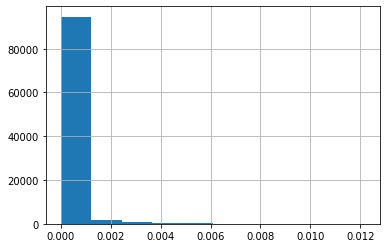

In [140]:
gap_data.hist()

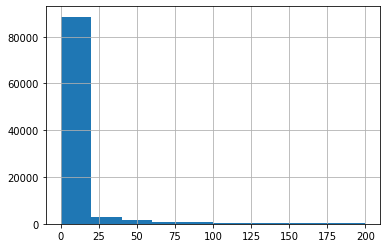

In [31]:
gap_data[gap_data < 200].hist()

только 5% возвращается спустя 2 месяца

In [32]:
gap_data.quantile(0.95)

59.760440972222156

90% возвращается спустя 18 дней, 10% более чем через 18 дней

In [33]:
gap_data.quantile(0.9)

18.325995370370403

## Введите id Анатолия Карпова, под которым он фигурирует в данных events_data_train и submissions_data_train.

In [52]:
#Если человек не получил сертификат и отсутствовал более 30 дней то он дропнувшийся

In [138]:
events_data.tail()

,step_id,timestamp,action,user_id
3480698,33375,1526772685,viewed,11677
3480699,32815,1526772750,viewed,5198
3480700,32815,1526772750,discovered,5198
3480701,32815,1526772750,passed,5198
3480702,33892,1526772811,viewed,18526


In [137]:
events_data.groupby('user_id', as_index=False) \
.agg({'timestamp': 'max'}).head()

,user_id,timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660


In [36]:
# максимальный таймстемп
30 * 24 * 60 * 60

2592000

In [136]:
events_data.groupby('user_id', as_index=False) \
.agg({'timestamp': 'max'}).head()

,user_id,timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660


In [131]:
users_data = events_data.groupby('user_id', as_index=False) \
.agg({'timestamp': 'max'}).rename(columns={'timestamp': 'last_timestamp'})

In [132]:
now = 1526772811
drop_out_treshold = 2592000

In [133]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_treshold

In [134]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [150]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [151]:
users_data.merge(users_scores).head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,2,1519226966,True,2,0
1,3,1444581588,True,29,23
2,5,1499859939,True,2,2
3,8,1481466913,True,9,21
4,14,1436368676,True,0,1


#### не все данные, т.к. по умолчанию учитывается только пересечение

In [152]:
users_data.merge(users_scores, how='outer').head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN


In [153]:
# по умолчанию merge ищет столбец с одинаковым названием
users_data.merge(users_scores, on='user_id', how='outer').head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN


In [154]:
users_data = users_data.merge(users_scores, on='user_id', how='outer')

In [110]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN


In [126]:
users_data = users_data.fillna(0)

In [125]:
users_data.head()

,user_id,last_timestamp,discovered,passed,started_attempt,viewed
0,1,1472827464,1,0,0,1
1,2,1519226966,9,9,2,10
2,3,1444581588,91,87,30,192
3,5,1499859939,11,11,4,12
4,7,1521634660,1,1,0,1


In [116]:
users_events_data = events_data.pivot_table(index='user_id', 
                        columns='action', 
                        values='step_id', 
                        aggfunc='count', 
                        fill_value=0).reset_index()


In [124]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [118]:
users_data = users_data.merge(users_events_data, on='user_id', how='outer')

In [119]:
users_data.head()

,user_id,last_timestamp,discovered,passed,started_attempt,viewed
0,1,1472827464,1,0,0,1
1,2,1519226966,9,9,2,10
2,3,1444581588,91,87,30,192
3,5,1499859939,11,11,4,12
4,7,1521634660,1,1,0,1


In [155]:
users_days = events_data.groupby('user_id').day.nunique()

In [156]:
users_days.head()

user_id
1    1
2    2
3    7
5    2
7    1
Name: day, dtype: int64

In [157]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [129]:
users_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [158]:
users_data = users_data.merge(users_days, on='user_id', how='outer')

In [159]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,day
0,1,1472827464,True,NaN,NaN,1
1,2,1519226966,True,2.0,0.0,2
2,3,1444581588,True,29.0,23.0,7
3,5,1499859939,True,2.0,2.0,2
4,7,1521634660,True,NaN,NaN,1


#### Проверяем не потеряли ли кого-нибудь?

In [110]:
users_data.user_id.nunique()

19234

In [162]:
users_data.sort_values(by='correct', ascending=False)

,user_id,last_timestamp,is_gone_user,correct,wrong,day
781,1046,1525160857,False,421.0,513.0,478
4007,5552,1520326441,True,186.0,93.0,56
12338,17135,1526143093,False,168.0,177.0,31
4479,6183,1511965795,True,142.0,65.0,39
6113,8461,1493118766,True,135.0,42.0,25
...,...,...,...,...,...,...
19215,26773,1503590860,True,NaN,NaN,1
19216,26774,1483473263,True,NaN,NaN,1
19227,26788,1520766754,True,NaN,NaN,1
19228,26789,1447263419,True,NaN,NaN,1


In [161]:
events_data.user_id.nunique()

19234

#### Сколько человек прошло курс?

In [137]:
users_data['passed_course'] = users_data.passed > 170

In [145]:
users_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [150]:
# 100*1425/17809 - доля прошедших курс
users_data['passed_course'].value_counts(normalize=True)*100 # второй способ

False    92.591245
True      7.408755
Name: passed_course, dtype: float64